In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.io
def morsetrans(x,K,ga,be,method='bandwidth' ):
    filename='../morse_g{:.2f}_b{:.2f}_{}.mat'.format(ga,be,method)
    W=scipy.io.loadmat(filename)['W']
    assert(K<5)
    W=W[:,:,K]
    print filename,W.shape,W.dtype,np.sum(W)
    X=np.fft.fft(x)
    print X.shape,X.dtype ,X.sum()
    print np.sum(X.reshape([-1,1])*W)
    return np.fft.ifft( X.reshape([-1,1])*W,axis=0).T;

In [3]:
#morsewave(16000, 3, 2,fs,method='bandpass')

In [4]:
import soundfile  
filename='/home/bo/mydev/tsrc2017/input/train/audio/happy/01648c51_nohash_1.wav'
x,_=soundfile.read(filename)
x.shape

(16000,)

In [5]:
len(x),sum(x)

(16000, -2.33001708984375)

<IPython.core.display.Javascript object>


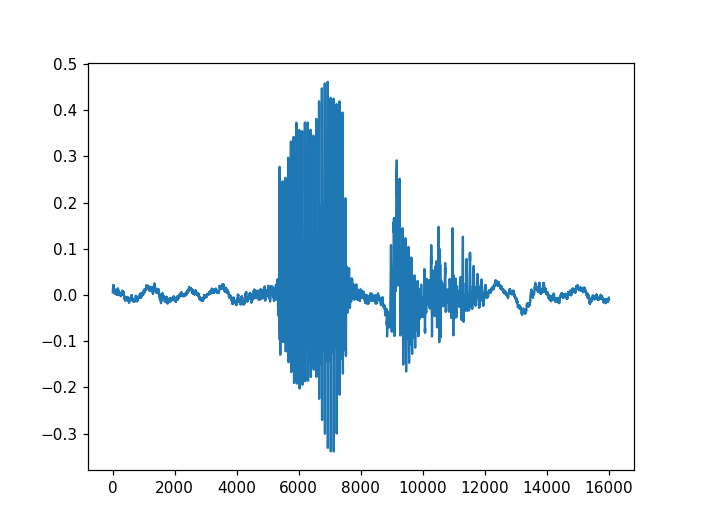

In [6]:
plt.figure(),plot(x);plt.show()

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 76320.7147149
(16000,) complex128 (93.26171875-1.13686837722e-13j)
(720.751321642-8148.42089706j)
(51, 16000)


<IPython.core.display.Javascript object>


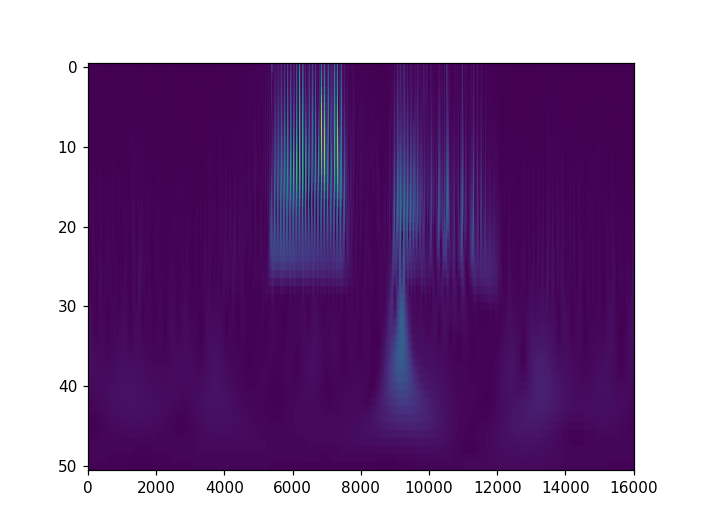

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 -24128.7781221
(16000,) complex128 (93.26171875-1.13686837722e-13j)
(-203.302571521-2136.17234658j)
(51, 16000)


<IPython.core.display.Javascript object>


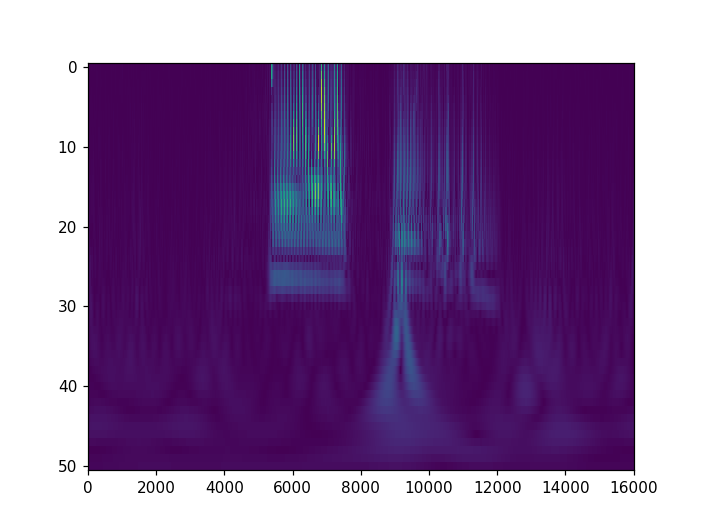

../morse_g3.00_b1.00_bandwidth.mat (16000, 51) float64 37895.4141691
(16000,) complex128 (93.26171875-1.13686837722e-13j)
(517.405144457-4201.76212928j)
(51, 16000)


<IPython.core.display.Javascript object>


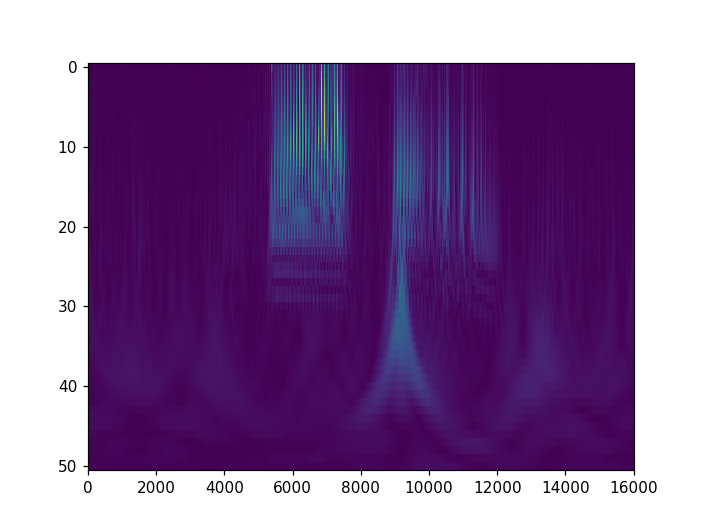

(51, 16000)


In [7]:
lst=[]
lst2=[]

for K in range(3):
    a=morsetrans(x,K, 3,1)
    lst.append(a)
    b=np.log1p(np.abs(a))
    print b.shape
    plt.figure();imshow(b,aspect='auto');plt.show()
    lst2.append(b)
a=np.sum(lst,0)
b=np.log1p(np.abs(a))
print b.shape
imshow(b,aspect='auto');plt.show()


In [8]:
 np.sort(b.reshape([-1]))[-100:].mean()

0.51283039384634854

<IPython.core.display.Javascript object>


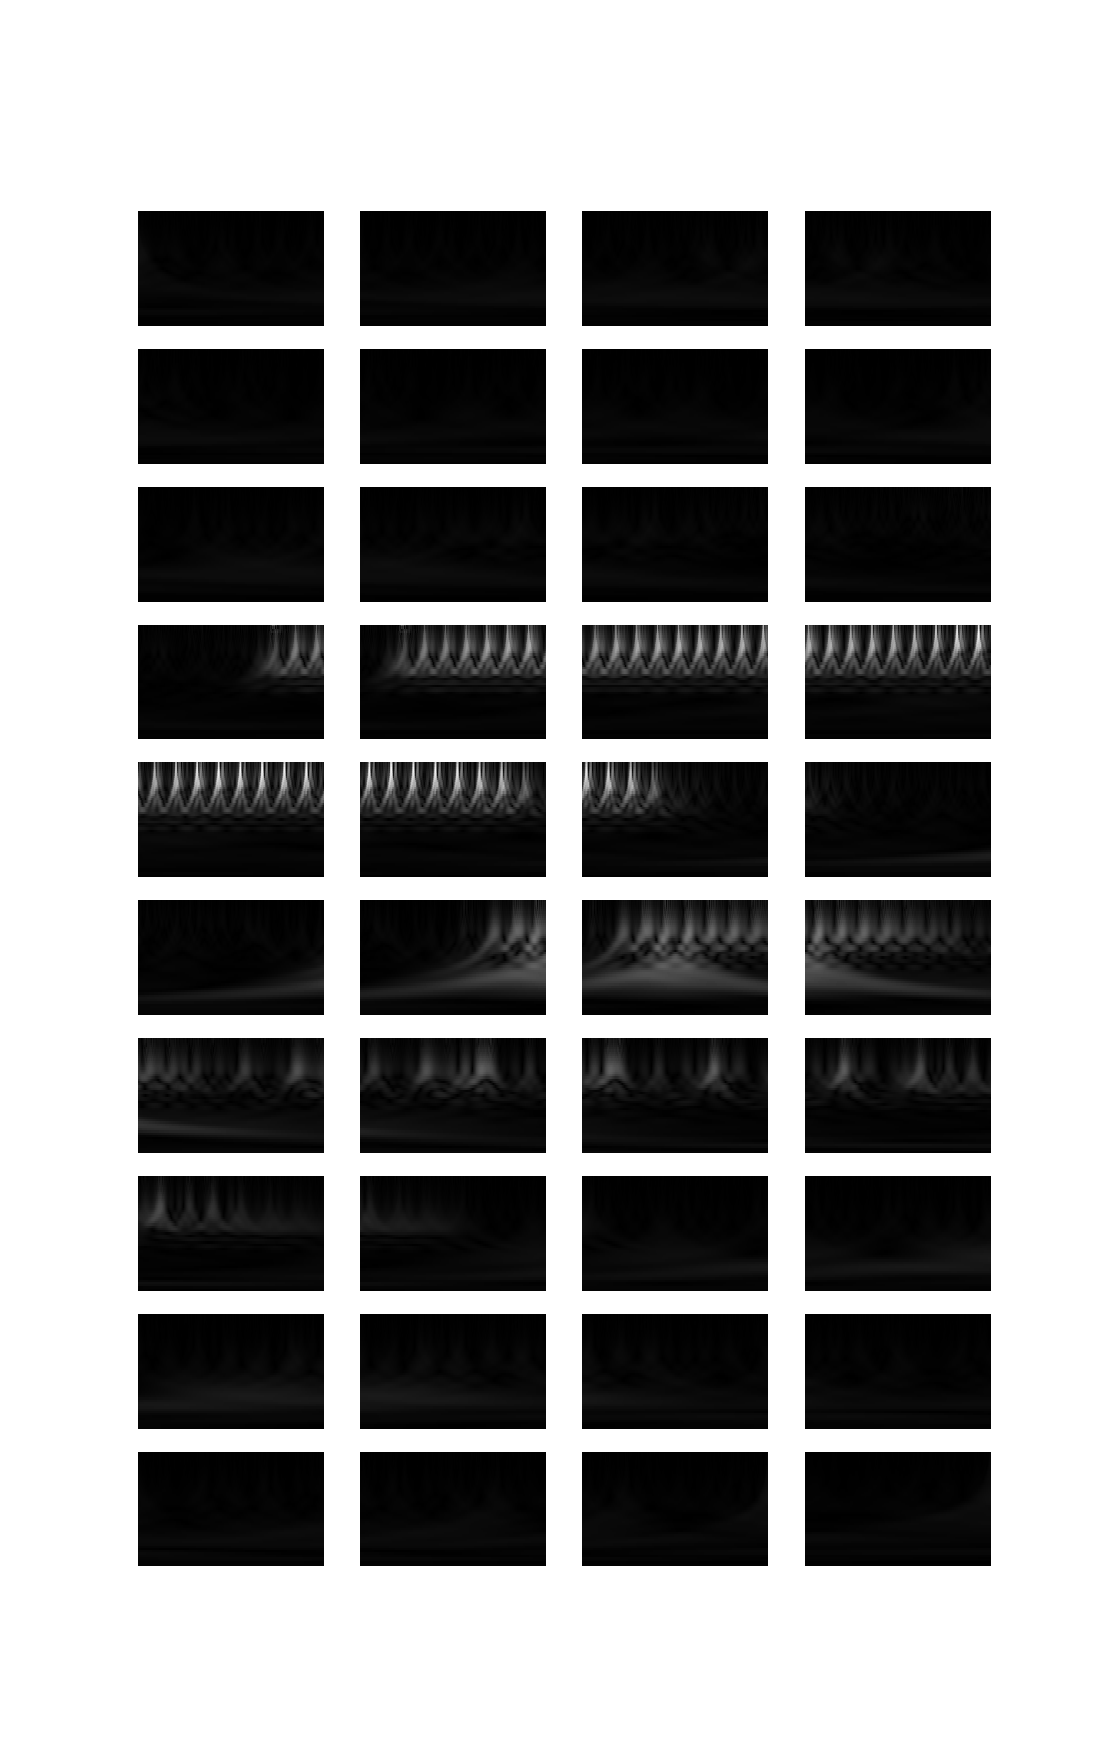

0.00874351521188 0.00633199925601
0 15 1 1
0.00887998954575 0.00707061276576
0 13 1 2
0.0101132117597 0.00806096640841
0 13 1 3
0.00936827469134 0.00754220049331
0 13 1 4
0.0076271662042 0.00614366922727
0 12 2 1
0.00750452013158 0.00557583573087
0 11 2 2
0.00765905268325 0.00578126841034
0 10 2 3
0.00830111430401 0.00683592806345
0 12 2 4
0.0101633539138 0.0082407541235
0 14 3 1
0.0107428312398 0.00790984779233
0 14 3 2
0.00915825965068 0.00608558401206
0 12 3 3
0.00807425915137 0.00450577937617
0 11 3 4
0.0239752347967 0.0396010135682
0 129 4 1
0.0531604302559 0.0663394244475
0 175 4 2
0.068671251847 0.080628334019
0 181 4 3
0.0691769842606 0.0840714919003
0 246 4 4
0.0671263714454 0.0860050923913
0 255 5 1
0.0642889241161 0.0837887923667
0 255 5 2
0.0385064411631 0.0607944603862
0 235 5 3
0.0135206735218 0.0105682974261
0 33 5 4
0.0150978091158 0.0170722498248
0 48 6 1
0.0446571006864 0.0495383775843
0 113 6 2
0.0747049903975 0.054675018018
0 116 6 3
0.0596889183471 0.0471062237885


In [9]:
plt.figure(figsize=(10,16))
M2=400
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

In [10]:
from skimage.transform import resize
from PIL import Image
import PIL

In [11]:
a=Image.fromarray(bb)
print a.size
a=a.resize((119, 119))
a.size

(400, 51)


(119, 119)

<IPython.core.display.Javascript object>


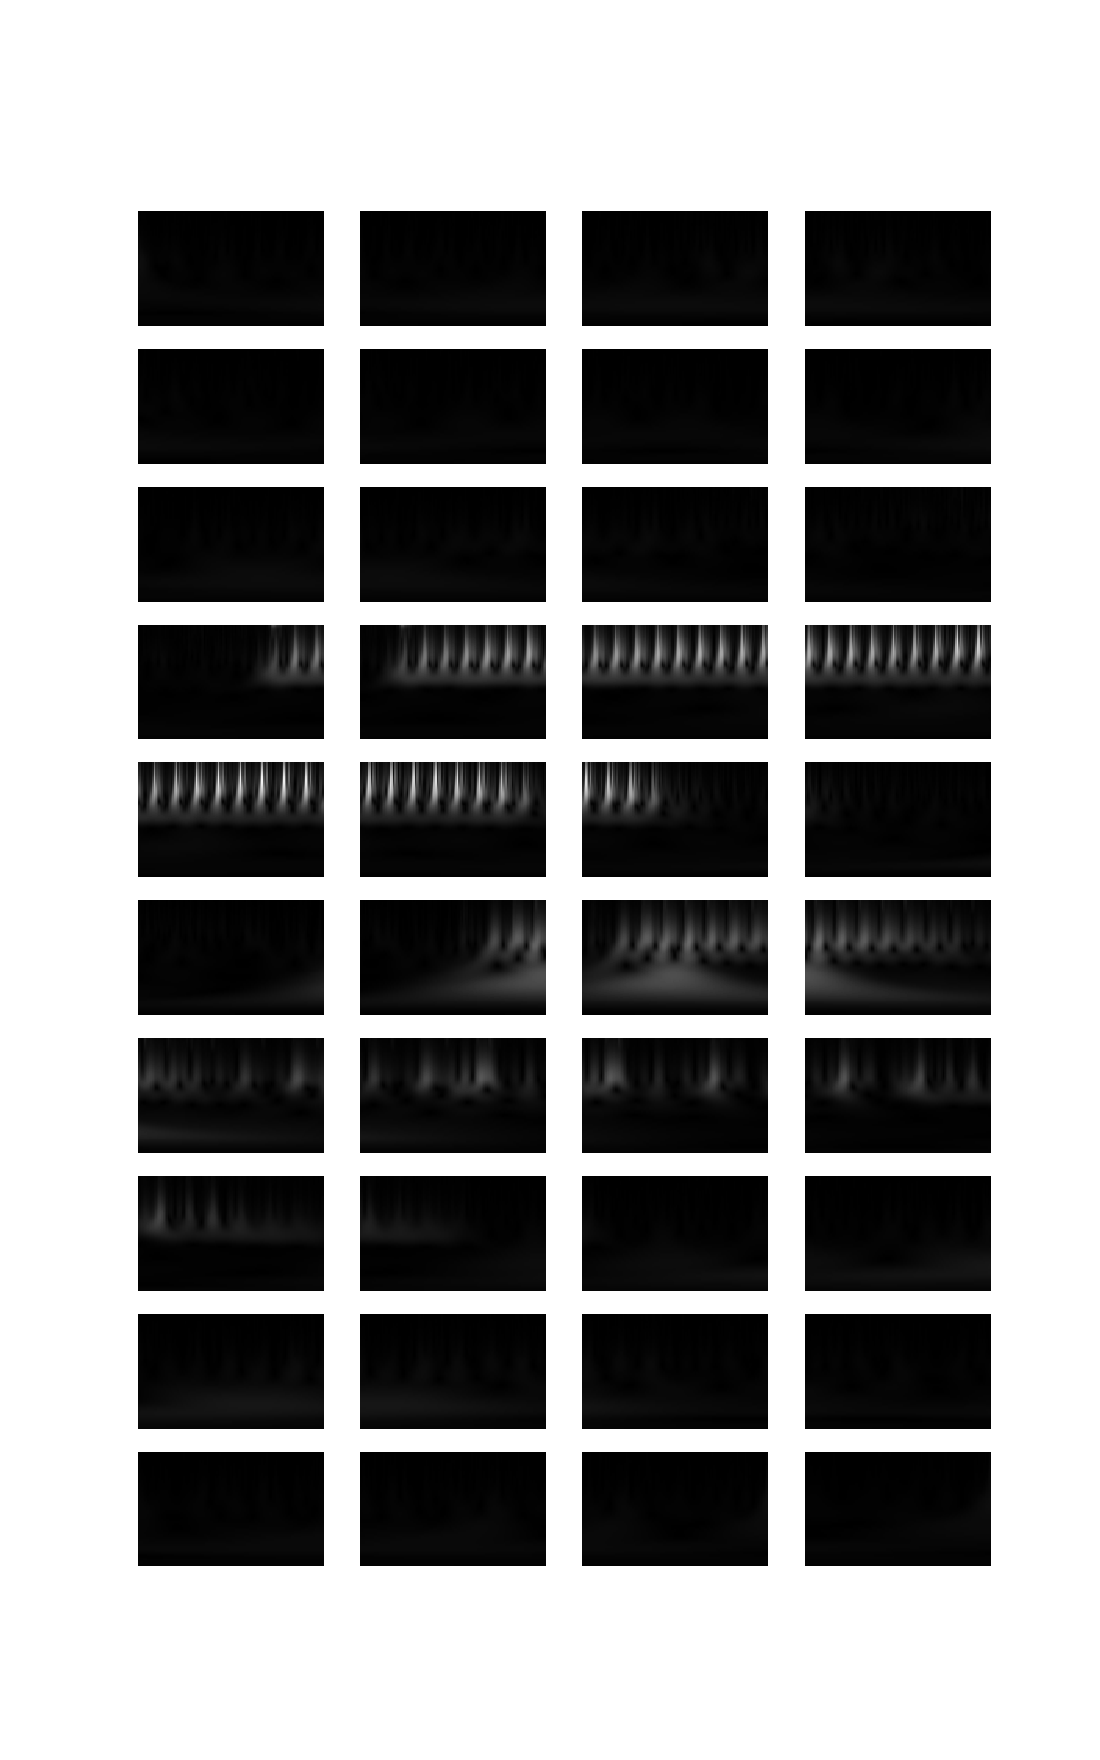

0.00412005450029 0.00314063937085
0 14 1 1
(119, 119)
0.00431814419654 0.00362543836859
0 11 1 2
(119, 119)
0.00511681103973 0.00414658719219
0 11 1 3
(119, 119)
0.00467448181189 0.00382350493299
0 11 1 4
(119, 119)
0.00357246048102 0.00303363666422
0 10 2 1
(119, 119)
0.0034300114181 0.00270033661653
0 8 2 2
(119, 119)
0.00356027993854 0.002771432604
0 8 2 3
(119, 119)
0.00402852801486 0.0033740818779
0 11 2 4
(119, 119)
0.00517215075953 0.00425465506246
0 12 3 1
(119, 119)
0.00549310623372 0.00405204330622
0 12 3 2
(119, 119)
0.00457526015601 0.00295011818126
0 10 3 3
(119, 119)
0.0039726913641 0.0020355438914
0 9 3 4
(119, 119)
0.0119678547914 0.0205723140247
0 120 4 1
(119, 119)
0.0269205632137 0.0349067484625
0 167 4 2
(119, 119)
0.03553015234 0.042964254022
0 178 4 3
(119, 119)
0.0361754409663 0.045423439785
0 248 4 4
(119, 119)
0.0350551167248 0.0471644993376
0 255 5 1
(119, 119)
0.0334402471507 0.0459993736195
0 255 5 2
(119, 119)
0.0194840484002 0.0329765867136
0 234 5 3
(119,

In [12]:
plt.figure(figsize=(10,16))
M2=400
b=lst2[0]
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    bb=Image.fromarray(bb)
    bb=bb.resize((119, 119),PIL.Image.LANCZOS)
    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


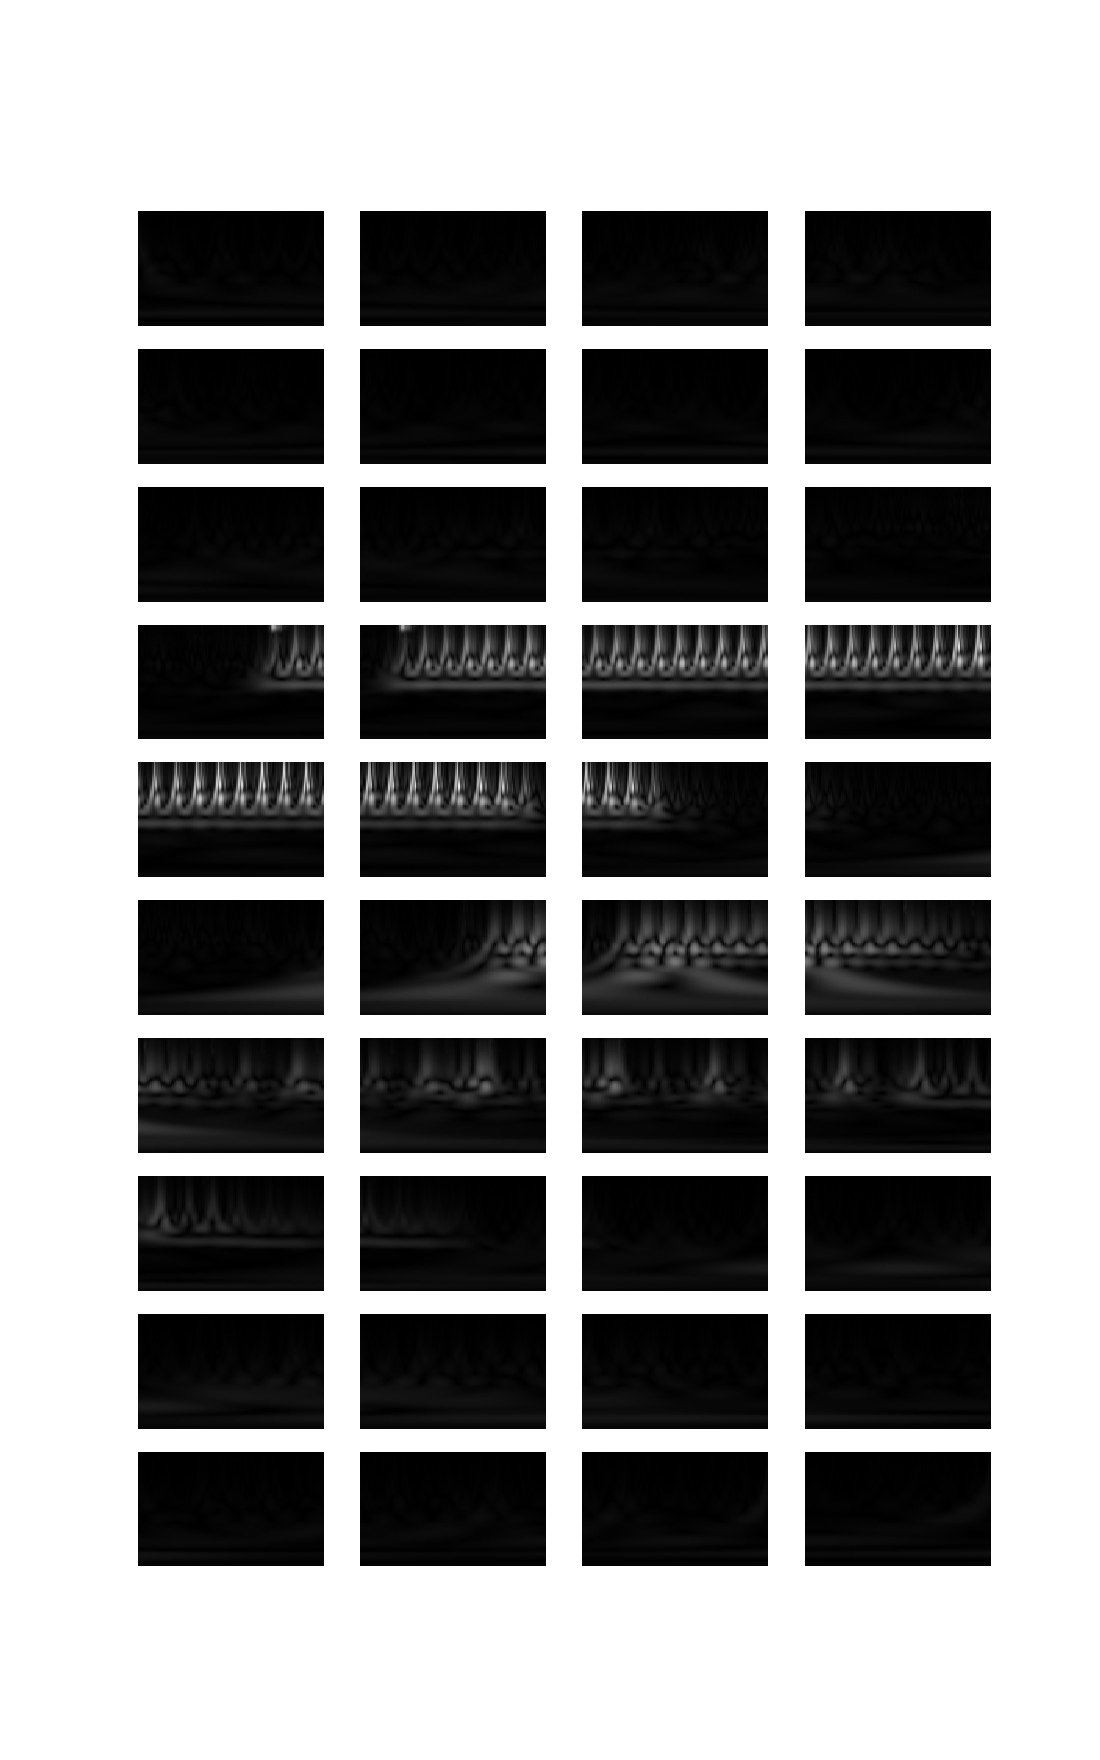

0.00384195917802 0.00320021961703
0 14 1 1
(119, 119)
0.00374052997242 0.00295308367429
0 13 1 2
(119, 119)
0.00420117810297 0.00296672638952
0 13 1 3
(119, 119)
0.0041172179527 0.00294128306373
0 13 1 4
(119, 119)
0.00338207598388 0.00278446905643
0 12 2 1
(119, 119)
0.00322143077176 0.00285238863529
0 14 2 2
(119, 119)
0.00334696400633 0.00306393292778
0 14 2 3
(119, 119)
0.00362977945713 0.0031770005569
0 14 2 4
(119, 119)
0.00400532008111 0.00302968970632
0 13 3 1
(119, 119)
0.00427903983435 0.00282752261322
0 12 3 2
(119, 119)
0.00408688857359 0.00250437417684
0 12 3 3
(119, 119)
0.0036087515137 0.00200177797003
0 12 3 4
(119, 119)
0.0114183103851 0.0186545971709
0 183 4 1
(119, 119)
0.0258803326883 0.0304505689552
0 190 4 2
(119, 119)
0.033624105581 0.0364570068885
0 206 4 3
(119, 119)
0.0340723168609 0.0387907043804
0 245 4 4
(119, 119)
0.0339668952072 0.0405234152373
0 255 5 1
(119, 119)
0.0325797342285 0.0390800311835
0 255 5 2
(119, 119)
0.018567241194 0.0284977816842
0 242 5

In [13]:
plt.figure(figsize=(10,16))
M2=400
b=lst2[1]
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    bb=Image.fromarray(bb)
    bb=bb.resize((119, 119),PIL.Image.LANCZOS)
    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()